In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
import re

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
tweets = pd.read_csv('/content/tweet_dataset.csv')

In [6]:
tweets_df = tweets[tweets['airline_sentiment_confidence'] >= 0.5]

In [7]:
X = tweets_df['text']
y = tweets_df['airline_sentiment']

In [8]:
stop_words = set(stopwords.words('english'))

In [9]:
stemmer = PorterStemmer()

In [10]:
cleaned_data = []

for tweet in X:
    tweet = re.sub('[^a-zA-Z]', ' ', tweet)
    tweet = tweet.lower().split()
    tweet = [stemmer.stem(word) for word in tweet if (word not in stop_words)]
    tweet = ' '.join(tweet)
    cleaned_data.append(tweet)

In [11]:
cv = CountVectorizer(max_features=3000, stop_words=['virginamerica', 'unit'])

In [12]:
X_fin = cv.fit_transform(cleaned_data).toarray()

In [13]:
sentiment_ordering = {'negative': 0, 'neutral': 1, 'positive': 2}
y = y.map(sentiment_ordering)

In [14]:
y

0        1
2        1
3        0
4        0
5        0
        ..
14634    0
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14404, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_fin, y, test_size=0.3, random_state=42)

In [16]:
X_train.shape

(10082, 3000)

In [17]:
y_test.shape

(4322,)

In [18]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [19]:
y_pred = model.predict(X_test)

In [20]:
cf = classification_report(y_test, y_pred, target_names=sentiment_ordering.keys())

In [21]:
print(cf)

              precision    recall  f1-score   support

    negative       0.83      0.88      0.86      2782
     neutral       0.61      0.49      0.54       866
    positive       0.70      0.69      0.69       674

    accuracy                           0.77      4322
   macro avg       0.71      0.69      0.70      4322
weighted avg       0.77      0.77      0.77      4322



In [22]:
pip install seaborn matplotlib

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
conf_mat = confusion_matrix(y_test, y_pred)

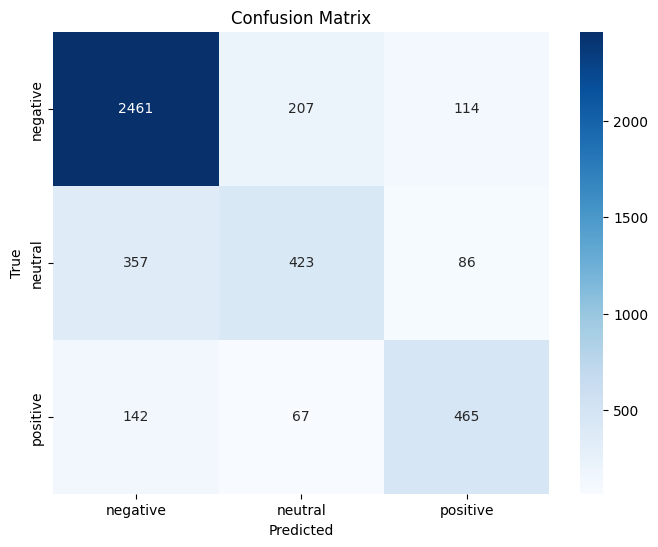

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=sentiment_ordering.keys(),
            yticklabels=sentiment_ordering.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Sample Example with a positive input**

In [26]:
input_sentence = "I love flying with this airline!"

In [27]:
input_sentence = re.sub('[^a-zA-Z]', ' ', input_sentence)
input_sentence = input_sentence.lower().split()
input_sentence = [stemmer.stem(word) for word in input_sentence if (word not in stop_words)]
input_sentence = ' '.join(input_sentence)

In [28]:
input_features = cv.transform([input_sentence]).toarray()

In [29]:
predicted_sentiment_index = model.predict(input_features)[0]

In [30]:
predicted_sentiment_label = [k for k, v in sentiment_ordering.items() if v == predicted_sentiment_index][0]

In [31]:
print(f"Predicted Sentiment: {predicted_sentiment_label}")

Predicted Sentiment: positive
